# Introduction to Pandas

## Setup and preliminaries

In [1]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Exercise: NYPD Vehicle Collisions

* We interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collisions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


### Task 1: 

Download the dataset. Use the "Export" view, get the URL for the CSV file, and dowload it using curl. (See the top of the notebook for guidance.) 


#### Solution

In [34]:
# It is a big file, ~350Mb. It will take 2-3 minutes to download
!curl https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD -o accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  354M    0  354M    0     0  4363k      0 --:--:--  0:01:23 --:--:-- 4063k


In [35]:
df = pd.read_csv("accidents.csv", low_memory=False)

In [36]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

### Task 2: 

Find out the most common contributing factors to the collisions. 
 

#### Solution

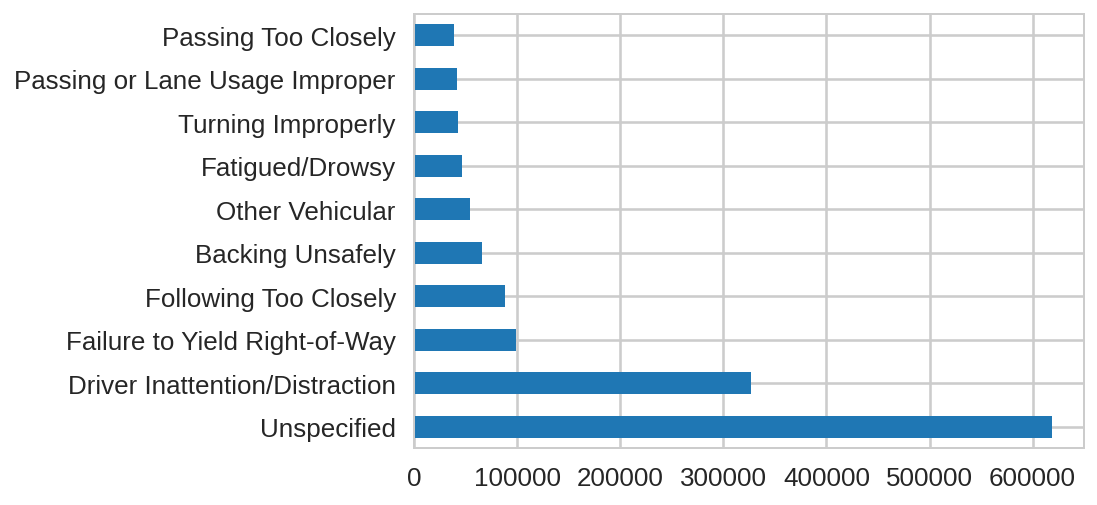

In [37]:
# Task 2: Find out the most common contributing factors to the collisions.
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().plot(kind='barh')

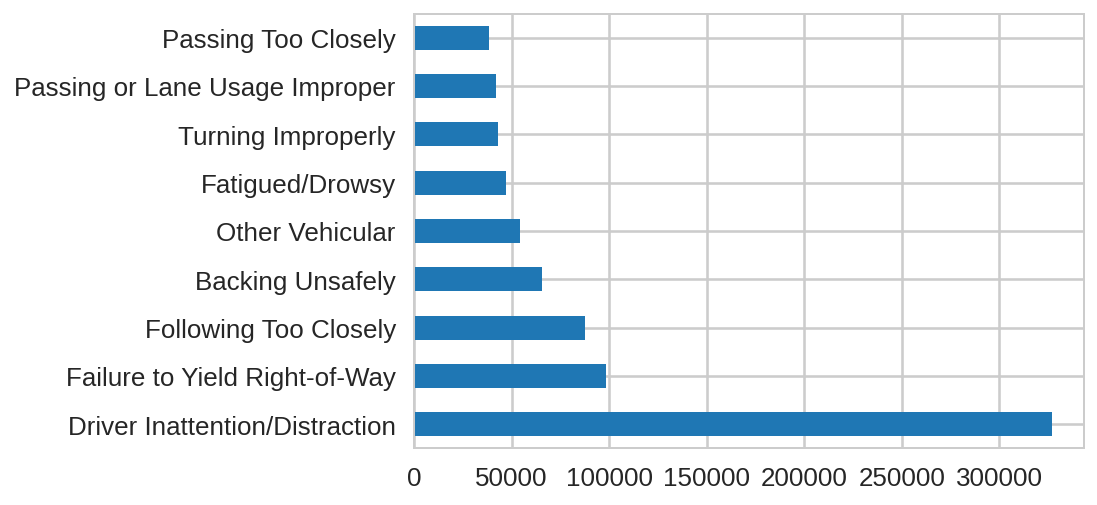

In [47]:
# Task 2: If we want to remove the "Unspecified", we select the elements starting
# from position 1 (i.e., the second element in the list, the first one is 0)
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:10].plot(kind='barh')

### Task 3: 

Break down the number of collisions by borough.





#### Solution

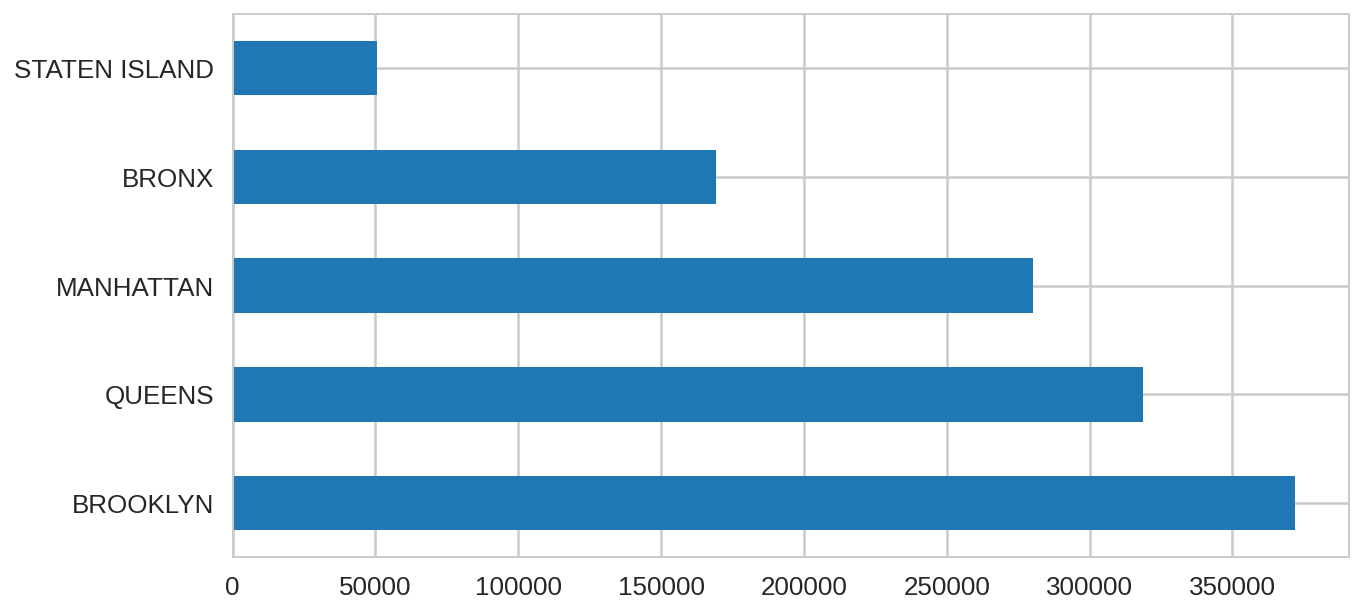

In [50]:
# Task 3: Break down the number of collisions by borough.
df['BOROUGH'].value_counts().plot(kind='barh', figsize=(10,5))

### Task 4

Find out the how many collisions had 0 persons injured, 1 persons injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

#### Solution

Text(0.5, 1.0, 'Analysis of number of injuries per collision')

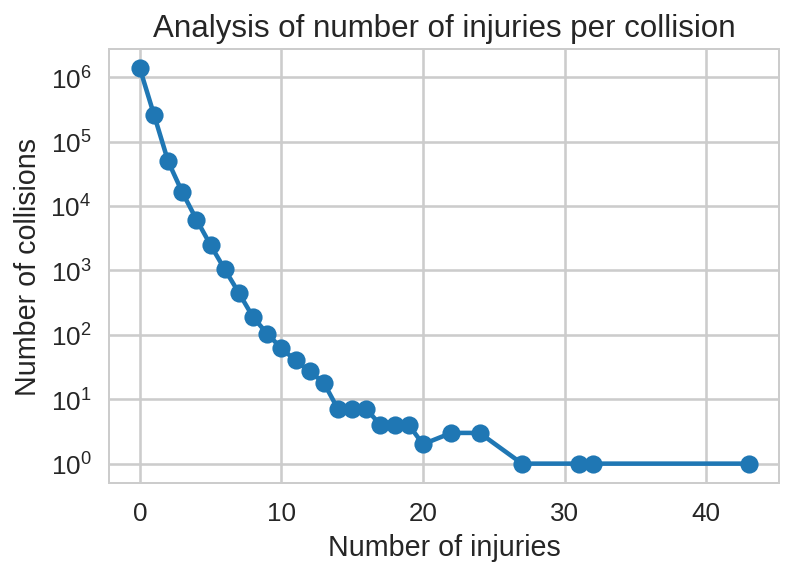

In [39]:
# "Chain" style of writing data maniputation operations
plot = (
    df['NUMBER OF PERSONS INJURED'] # take the num of injuries column
    .value_counts() # compure the freuquency of each value
    .sort_index() # sort the results based on the index value instead of the frequency, 
                  # which is the default for value_counts
    .plot( # and plot the results
        kind='line', # we use a line plot because the x-axis is numeric/continuous
        marker='o',  # we use a marker to mark where we have data points 
        logy=True # make the y-axis logarithmic
    )
)
plot.set_xlabel("Number of injuries")
plot.set_ylabel("Number of collisions")
plot.set_title("Analysis of number of injuries per collision")

### Task 5

(a) Compute the average number of injuries and deaths per accident, broken down by borough. Use the `pivot_table` functionality, putting `BOROUGH` as the index. You can answer this query by generating two separate tables, or you can create a single table by using the fact that you can pass a list of attributes/columns to the `values` parameter of the pivot table.

(b) Repeat the exercise above, but break down the average number of deaths and injuries using the contributing factor for the accident. Use the `sort_values` command to sort the results, putting on top the contributing factors that generate the highest number of deaths.

#### Solution

In [40]:
pd.pivot_table(
    data = df,
    index = 'BOROUGH',
    aggfunc = 'mean',
    values = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
)

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
BOROUGH,,
BRONX,0.289939,0.001028
BROOKLYN,0.294556,0.001188
MANHATTAN,0.178356,0.000853
QUEENS,0.266346,0.001246
STATEN ISLAND,0.255876,0.001404


In [41]:
pd.pivot_table(
    data = df,
    index = 'CONTRIBUTING FACTOR VEHICLE 1',
    aggfunc = 'mean',
    values = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
).sort_values('NUMBER OF PERSONS KILLED', ascending=False)

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
CONTRIBUTING FACTOR VEHICLE 1,,
Illnes,0.874060,0.040414
Unsafe Speed,0.629104,0.011816
Drugs (illegal),0.751773,0.010638
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,0.750480,0.009129
Traffic Control Disregarded,0.638465,0.007204
...,...,...
Cell Phone (hand-Held),0.478142,0.000000
Brakes Defective,0.474219,0.000000
Animals Action,0.200794,0.000000


### Task 6

Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

#### Solution

In [42]:
pivot = pd.pivot_table(
    data = df, # we analyze the df (accidents) dataframe
    index = 'CONTRIBUTING FACTOR VEHICLE 1', 
    columns = 'BOROUGH', 
    values = 'COLLISION_ID', 
    aggfunc = 'count'
)

# Create an extra column showing the total deaths across boroughs (=columns)
pivot["Total"] = pivot.sum(axis="columns") 

# Sort the dataframe by descending order of the values in the column "Total"
pivot = pivot.sort_values("Total", ascending=False)

pivot

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Total
CONTRIBUTING FACTOR VEHICLE 1,,,,,,
Unspecified,74840.0,164257.0,92300.0,119988.0,21020.0,472405.0
Driver Inattention/Distraction,25633.0,58631.0,56567.0,65739.0,9460.0,216030.0
Failure to Yield Right-of-Way,7499.0,23832.0,12657.0,26262.0,2995.0,73245.0
Backing Unsafely,7456.0,15357.0,10167.0,16269.0,2224.0,51473.0
Other Vehicular,7769.0,8070.0,17178.0,5255.0,1242.0,39514.0
...,...,...,...,...,...,...
Windshield Inadequate,7.0,17.0,11.0,11.0,NaN,46.0
Shoulders Defective/Improper,12.0,7.0,13.0,10.0,3.0,45.0
Texting,2.0,5.0,5.0,2.0,3.0,17.0


### Task 7

Find the dates with the most accidents. Can you figure out what happened on these days? 


#### Solution

In [43]:
df["CRASH DATE"].value_counts()

01/21/2014    1161
11/15/2018    1065
12/15/2017     999
05/19/2017     974
01/18/2015     961
              ... 
04/23/2020     108
04/12/2020     106
04/09/2020     103
04/19/2020     102
04/05/2020      93
Name: CRASH DATE, Length: 3009, dtype: int64

### Task 8

Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


#### Solution 

In [44]:
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"], format="%m/%d/%Y", errors="coerce")

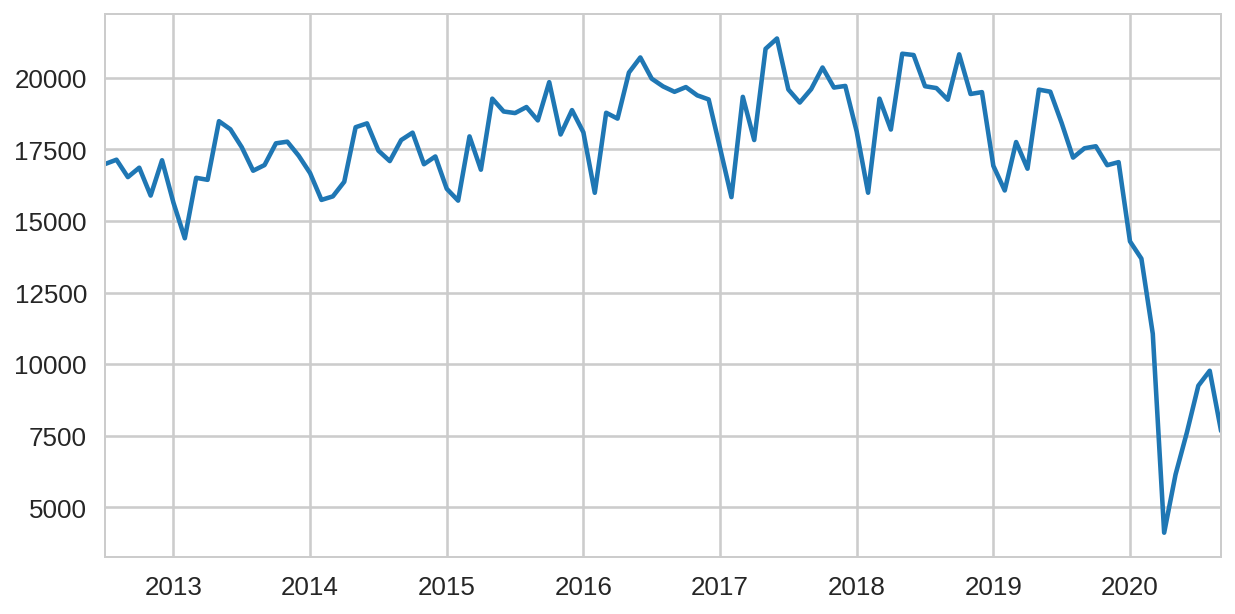

In [52]:
(
    df["CRASH DATE"].value_counts() # count the number of accidents per day
    .sort_index() # sort the dates
    .resample('1M') # take periods of 1 month
    .sum() # sum the number of accidents per month
    .plot(figsize=(10,5)) # plot the result
)